In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Task 1(Load the dataset from the sklearn datasets library).

In [10]:
from sklearn.datasets import load_wine
df=load_wine()
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [9]:
df1=pd.DataFrame(data=np.c_[df['data'],df['target']],columns=df['feature_names']+['target'])
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


# Data Exploration.

# Create a Histogram for each input.

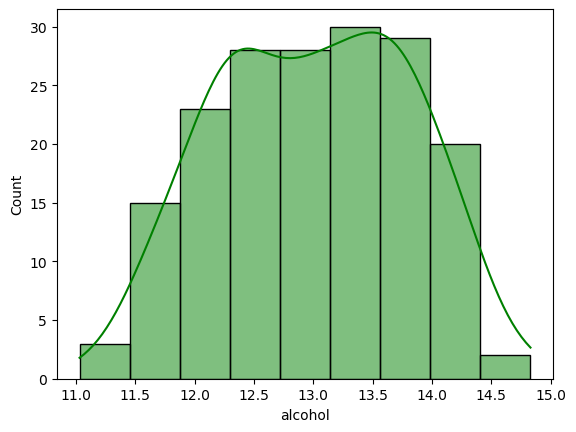

In [51]:
sb.histplot(df1['alcohol'],kde=True,color='g');

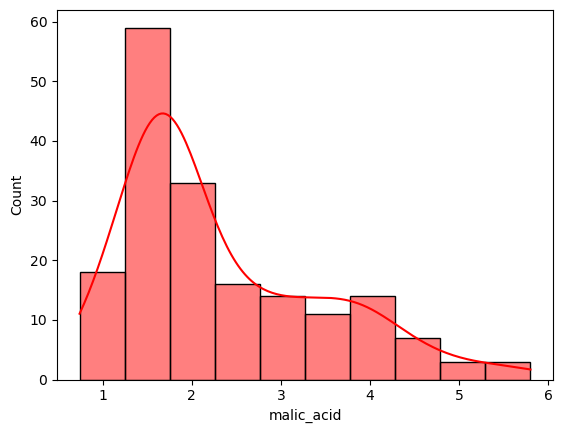

In [54]:
sb.histplot(df1['malic_acid'],kde=True,color='r');

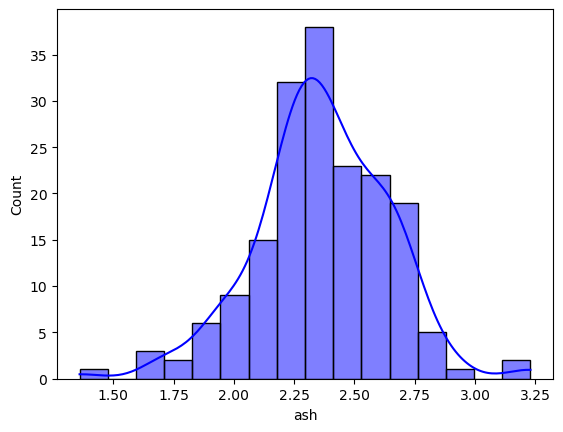

In [55]:
sb.histplot(df1['ash'],kde=True,color='b');

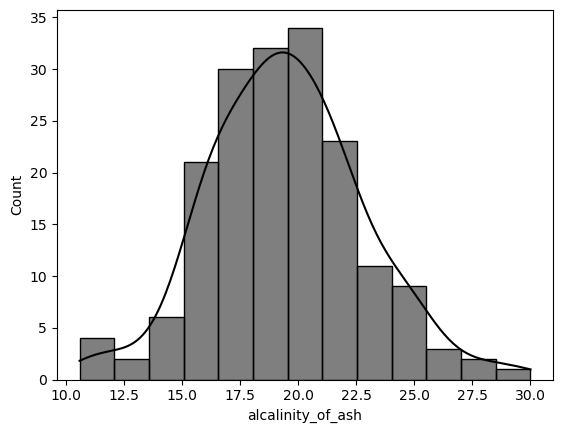

In [56]:
sb.histplot(df1['alcalinity_of_ash'],kde=True,color='k');

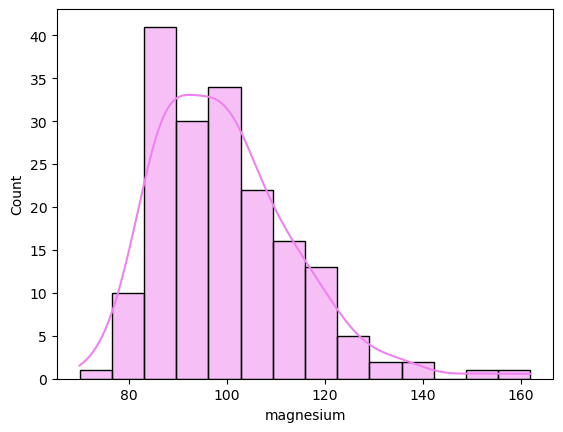

In [64]:
sb.histplot(df1['magnesium'],kde=True,color='violet');

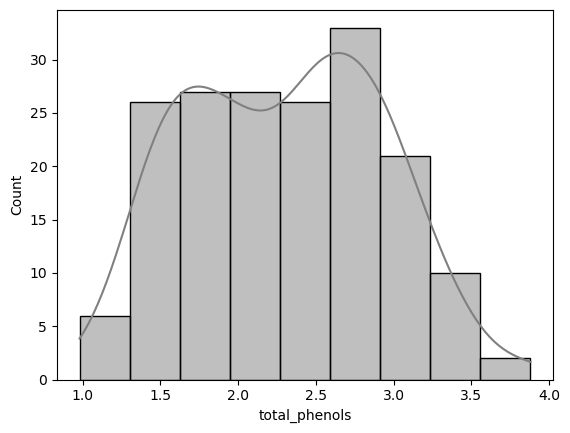

In [72]:
sb.histplot(df1['total_phenols'],kde=True,color='grey');

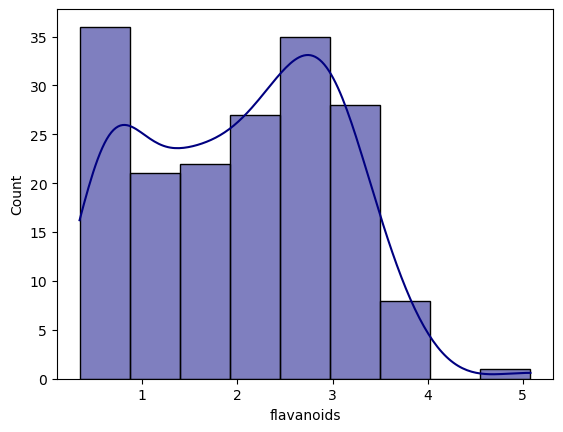

In [70]:
sb.histplot(df1['flavanoids'],kde=True,color='navy');

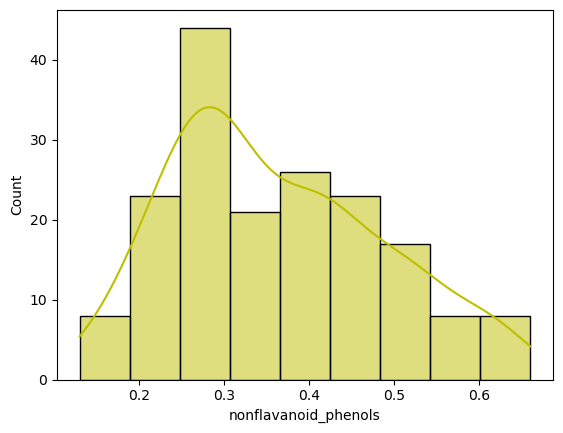

In [67]:
sb.histplot(df1['nonflavanoid_phenols'],kde=True,color='y');

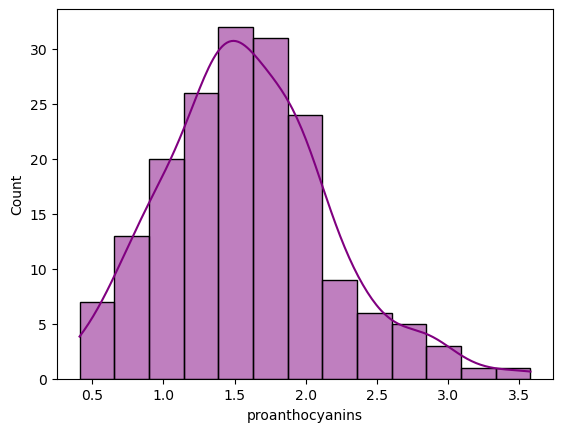

In [63]:
sb.histplot(df1['proanthocyanins'],kde=True,color='purple');

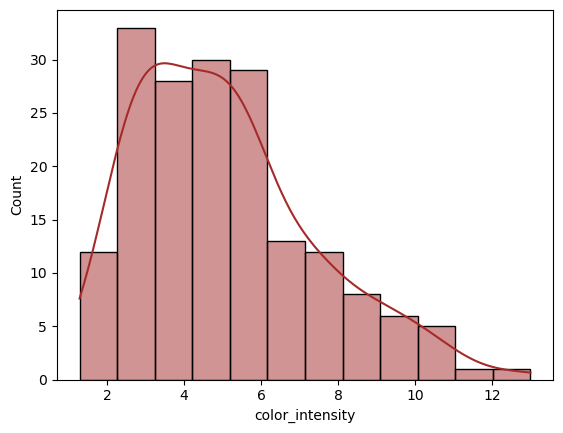

In [69]:
sb.histplot(df1['color_intensity'],kde=True,color='brown');

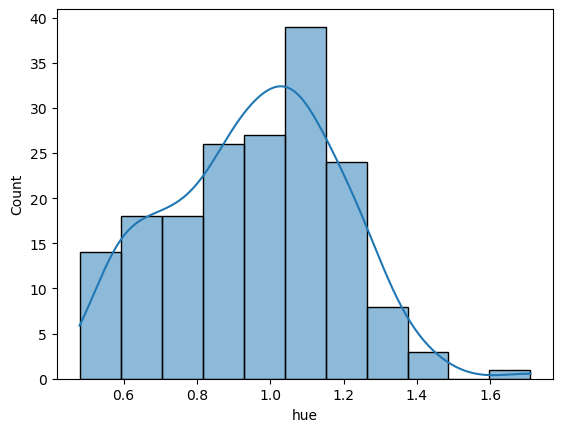

In [31]:
sb.histplot(df1['hue'],kde=True);

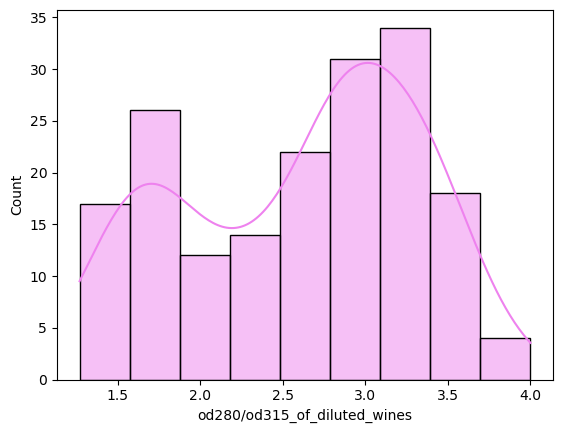

In [66]:
sb.histplot(df1['od280/od315_of_diluted_wines'],kde=True,color='violet');

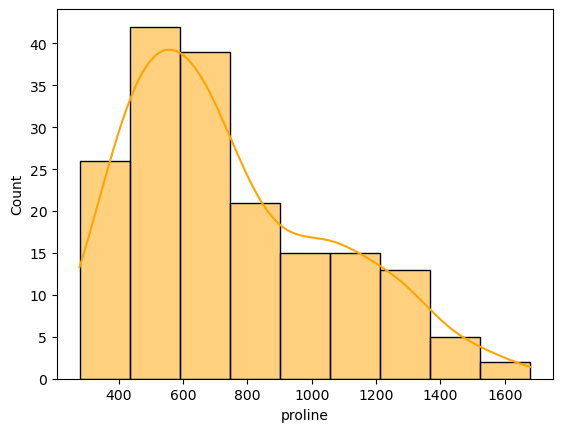

In [68]:
sb.histplot(df1['proline'],kde=True,color='orange');

ash,alcalinity_of_ash,proanthocyanins,hue this input values ate Normally Distributed.

# Preprocessing.

In [36]:
x=df1.drop(columns='target',axis=1)
y=df1['target']

In [37]:
#Splitting_data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [38]:
#Feature scaling
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

# Task 2(Build K-Nearest Neighbour cllassifer model and train the model with the data).

In [40]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model=KNN.fit(x_train,y_train)
model.score(x_train,y_train)

0.9859154929577465

In [41]:
y_pred=model.predict(x_test)
y_pred

array([0., 0., 2., 0., 1., 0., 1., 2., 1., 2., 0., 2., 0., 2., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 2., 2., 2., 1., 0., 1., 0., 0., 1., 2., 0.,
       0., 0.])

In [43]:
model=KNN.fit(x_test,y_test)
model.score(x_train,y_train)

0.9366197183098591

In [45]:
print(accuracy_score(y_test,y_pred))

0.9444444444444444


# classifer performance using attribute scores.

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        14
         1.0       1.00      0.86      0.92        14
         2.0       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



# Find a good K for the test data using the "for" loop and score and train the test.

Text(0.5, 1.0, 'error vs K-valus')

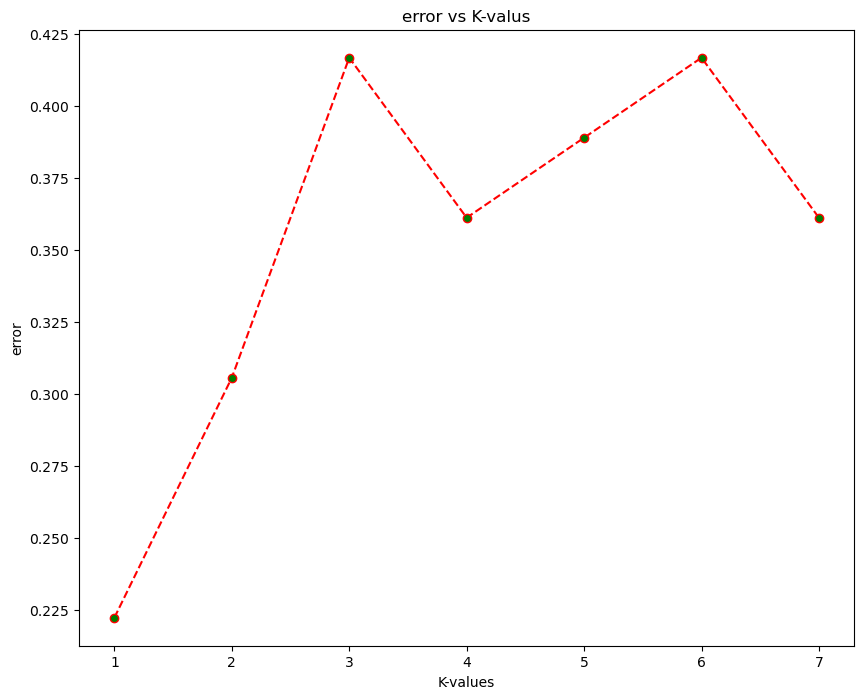

In [85]:
error=[]
for k in range(1,8):
    KNN=KNeighborsClassifier(k)
    KNN.fit(x_train,y_train)
    predict_value=KNN.predict(x_test)
    error.append(np.mean(predict_value!=y_test))
plt.figure(figsize=(10,8))
plt.plot(range(1,8),error,color='r',marker='o',linestyle='dashed',markerfacecolor='green')
plt.xlabel('K-values')
plt.ylabel('error')
plt.title('error vs K-valus')

The best k-value is 1.